# Regenerar Information Value

En esta notebook vamos a regenerar el listado con information value...

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd

entire_df = pd.read_csv("../output/provinces_words.csv", index_col=0)

df = entire_df
#df = df[(df.cantPalabra > 20) & (df.cantUsuariosTotal > 2)].copy() 

In [2]:
import re

cant_palabras = [c for c in df.columns if re.match(r'.*ocurrencias$', c)]
cant_personas = [c for c in df.columns if re.match(r'.*usuarios$', c)]

print("columnas de palabras => {}\n".format(cant_palabras))
print("columnas de usuarios => {}".format(cant_personas))

df["cant_provincias"] = (df[cant_palabras] > 0).sum(axis=1)
df["cant_palabra"] = df[cant_palabras].sum(axis=1)
df["cant_usuarios"] = df[cant_personas].sum(axis=1)

columnas de palabras => ['buenosaires_ocurrencias', 'catamarca_ocurrencias', 'chaco_ocurrencias', 'chubut_ocurrencias', 'cordoba_ocurrencias', 'corrientes_ocurrencias', 'entrerios_ocurrencias', 'formosa_ocurrencias', 'jujuy_ocurrencias', 'lapampa_ocurrencias', 'larioja_ocurrencias', 'mendoza_ocurrencias', 'misiones_ocurrencias', 'neuquen_ocurrencias', 'rionegro_ocurrencias', 'salta_ocurrencias', 'sanjuan_ocurrencias', 'sanluis_ocurrencias', 'santacruz_ocurrencias', 'santafe_ocurrencias', 'santiago_ocurrencias', 'tierradelfuego_ocurrencias', 'tucuman_ocurrencias']

columnas de usuarios => ['buenosaires_usuarios', 'catamarca_usuarios', 'chaco_usuarios', 'chubut_usuarios', 'cordoba_usuarios', 'corrientes_usuarios', 'entrerios_usuarios', 'formosa_usuarios', 'jujuy_usuarios', 'lapampa_usuarios', 'larioja_usuarios', 'mendoza_usuarios', 'misiones_usuarios', 'neuquen_usuarios', 'rionegro_usuarios', 'salta_usuarios', 'sanjuan_usuarios', 'sanluis_usuarios', 'santacruz_usuarios', 'santafe_usuario

In [3]:
df.loc["aja"]

buenosaires_ocurrencias        263
buenosaires_usuarios           122
catamarca_ocurrencias          152
catamarca_usuarios             119
chaco_ocurrencias              358
chaco_usuarios                 231
chubut_ocurrencias             219
chubut_usuarios                130
cordoba_ocurrencias            232
cordoba_usuarios               157
corrientes_ocurrencias         149
corrientes_usuarios             98
entrerios_ocurrencias          665
entrerios_usuarios             414
formosa_ocurrencias            146
formosa_usuarios                87
jujuy_ocurrencias              110
jujuy_usuarios                  76
lapampa_ocurrencias            233
lapampa_usuarios               169
larioja_ocurrencias            124
larioja_usuarios                86
mendoza_ocurrencias            363
mendoza_usuarios               218
misiones_ocurrencias           209
misiones_usuarios              137
neuquen_ocurrencias            230
neuquen_usuarios               154
rionegro_ocurrencias

In [4]:
from scipy.stats import entropy
import numpy as np

df["entropy_palabras"] = df[cant_palabras].apply(entropy, axis=1, raw=True)
df["entropy_personas"] = df[cant_personas].apply(entropy, axis=1, raw=True)

df["delta_palabras"] = np.log(23) - df["entropy_palabras"]
df["delta_personas"] = np.log(23) - df["entropy_personas"]

In [5]:
df["log_cantidad"] = np.log(1+df.cant_palabra)
df["log_personas"] = np.log(1+df.cant_usuarios)

df["norm_cantidad"] = df["log_cantidad"] / df["log_cantidad"].max()
df["norm_personas"] = df["log_personas"] / df["log_personas"].max()

In [6]:
df["ival_palabras"] = df.norm_cantidad * df.delta_palabras
df["ival_personas"] = df.norm_personas * df.delta_personas


df["ival"] = df["ival_palabras"] * df["ival_personas"]

In [7]:
df.sort_values("ival_personas", inplace=True, ascending=False)

df["rank"] = range(df.shape[0])

df.iloc[:10][["cant_palabra", "cant_usuarios"]]

,cant_palabra,cant_usuarios
palabra,,
chivil,1976,518
ush,5050,1210
poec,1229,560
malpegue,1922,666
aijue,2211,715
tolhuin,2957,787
vallerga,1933,437
yarca,997,507
blv,5464,697


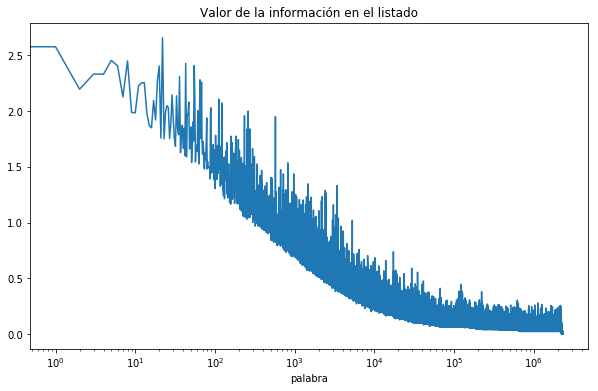

In [8]:
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10, 6)
df.ival.plot();
plt.title(u"Valor de la información en el listado")
plt.semilogx();

In [9]:
information_columns = [
    "delta_palabras", "delta_personas",
    "norm_cantidad", "norm_personas",
    "ival_personas", "ival_palabras", "ival",
]

df.iloc[:100][information_columns]

,delta_palabras,delta_personas,norm_cantidad,norm_personas,ival_personas,ival_palabras,ival
palabra,,,,,,,
chivil,3.112226,3.093523,0.444157,0.572145,1.769945,1.382316,2.446623
ush,2.919858,2.722807,0.499052,0.649686,1.768970,1.457162,2.577677
poec,3.007054,3.028690,0.416383,0.579267,1.754420,1.252087,2.196686
malpegue,3.007467,2.945352,0.442536,0.595105,1.752795,1.330913,2.332817
aijue,2.959627,2.905658,0.450730,0.601593,1.748023,1.333993,2.331850
tolhuin,3.006787,2.860045,0.467738,0.610362,1.745662,1.406388,2.455078
vallerga,3.131062,3.119296,0.442870,0.556617,1.736252,1.386653,2.407579
yarca,3.047463,3.030795,0.404151,0.570185,1.728114,1.231635,2.128405
blv,2.908627,2.792647,0.503663,0.599263,1.673529,1.464967,2.451666


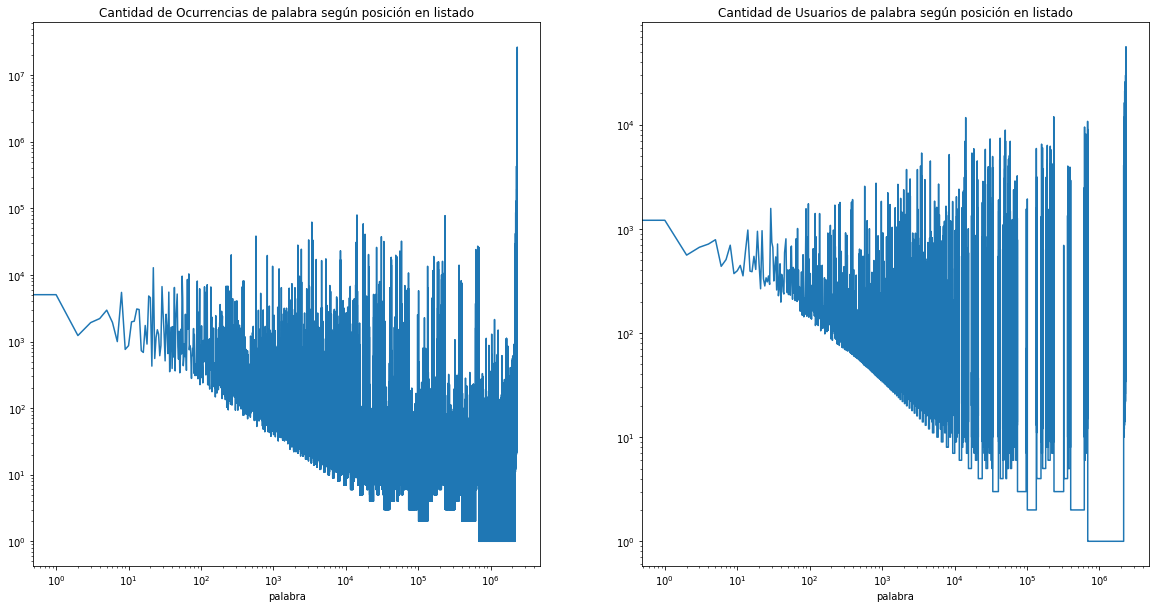

In [10]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.subplot(1, 2, 1)
df.cant_palabra.plot()


plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Ocurrencias de palabra según posición en listado");

plt.subplot(1, 2, 2)
df.cant_usuarios.plot()

plt.semilogx();
plt.semilogy();
plt.title(u"Cantidad de Usuarios de palabra según posición en listado");

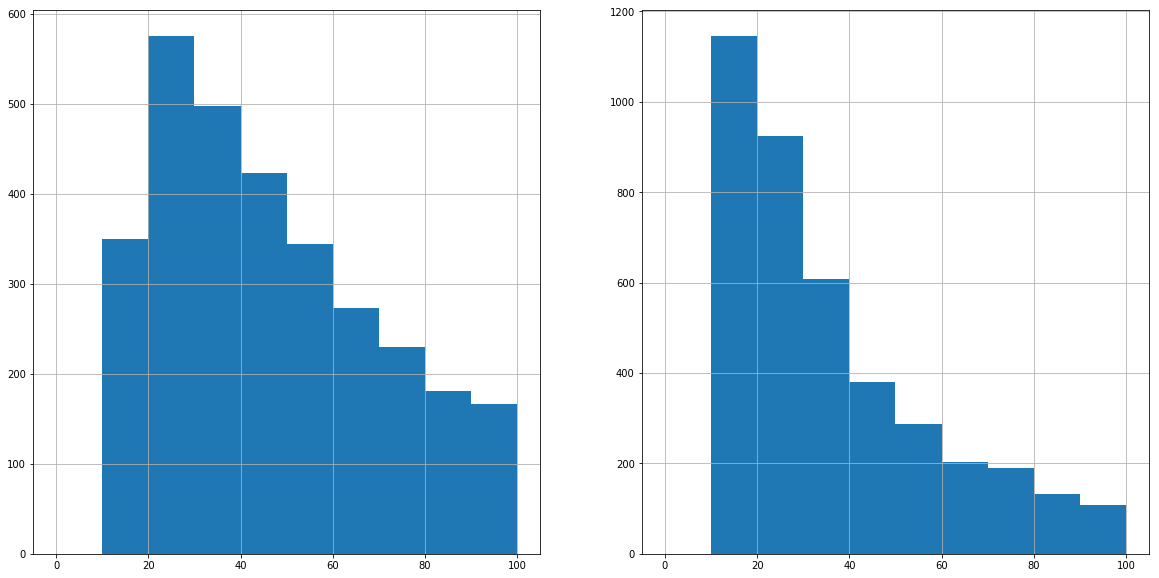

In [11]:
plt.subplot(1,2,1)
df.cant_palabra.iloc[:5000].hist(range=(0, 100))
plt.subplot(1,2,2)
df.cant_usuarios.iloc[:5000].hist(range=(0, 100))


## ¿Y qué onda estas nuevas palabras? ¿Son muchas nuevas?

In [12]:
cincomil_nuevas = df.iloc[:5000].copy()

Text(0.5,1,'Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias')

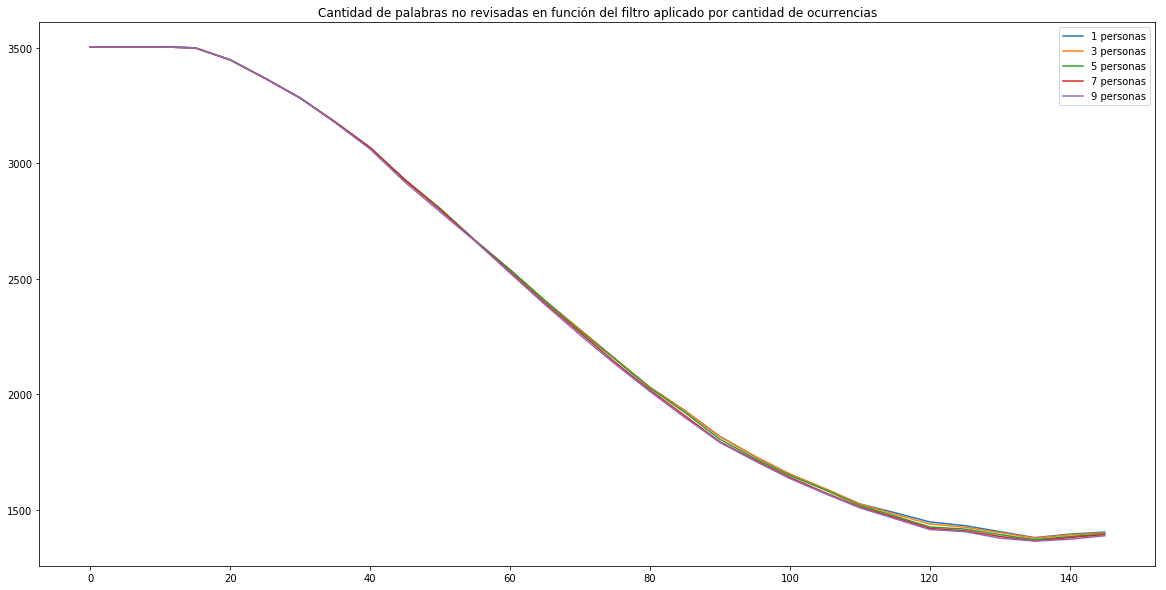

In [13]:
entire_df = pd.read_csv("../data/listado_definitivo.csv", index_col=0)
palabras_analizadas = entire_df.iloc[:5000].index
handles = []

for minimo_personas in range(1, 11, 2):
    filtros = range(0, 150, 5)

    diferencias = []
    
    for filtro in filtros:
        cincomil_nuevas = df[(df.cant_palabra > filtro) & (df.cant_usuarios >= minimo_personas)].iloc[:5000]
        diferencia = palabras_analizadas.difference(cincomil_nuevas.index)
        diferencias.append(len(diferencia))
    handle, = plt.plot(filtros, diferencias, label="{} personas".format(minimo_personas))
    
    handles.append(handle)
    
plt.legend(handles=handles)
plt.title(u"Cantidad de palabras no revisadas en función del filtro aplicado por cantidad de ocurrencias")


Acá estamos utilizando **TODO** el dataset (no sólo el training), con lo cual es esperable que los datos sean distintos. Ahora, tenemos una diferencia importante (por ej, filtrando con 40 palabras faltan etiquetar otras 3000). Habría que ver qué tradeoff hacemos.